<a href="https://colab.research.google.com/github/NNRahat/PyTorch_projects/blob/main/02_multiclass_classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
## requesting the file from github 
import requests
from pathlib import Path

# download helper function from learn Pytorch repo
if Path("helper_function.py").is_file():
  print("helper_funtion.py already exist!")
else:
  print("downloading helper_function.py!")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary, accuracy_fn

helper_funtion.py already exist!


## device ignostic code

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## create the data

In [ ]:
NUM_CLASSES = 4
NUM_FEATURES = 2
N_SAMPLES = 1000
MANUAL_SEED = 42

X_blob, y_blob = make_blobs(n_samples=N_SAMPLES,
                  n_features=NUM_FEATURES,
                  centers=NUM_CLASSES,
                  cluster_std=1.5,
                  random_state=MANUAL_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

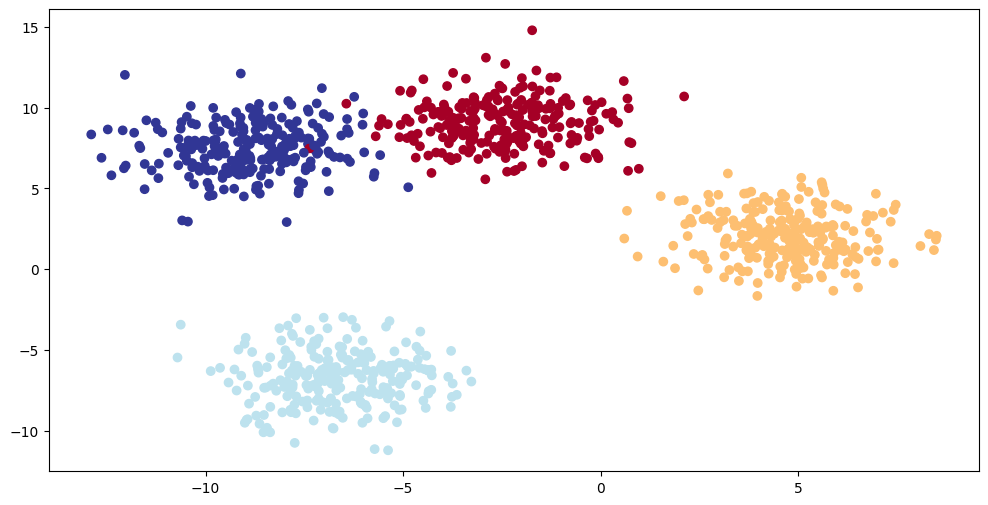

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=MANUAL_SEED)
len(X_blob_train),len(X_blob_test), len(y_blob_train), len(y_blob_test)

(800, 200, 800, 200)

In [ ]:
class MultiClassModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.Layer_of_3 = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
   
  def forward(self, x):
    return self.Layer_of_3(x)


## model creation

In [ ]:
model_5 = MultiClassModel(input_features = NUM_FEATURES, output_features = NUM_CLASSES, hidden_units = 8).to(device)
model_5 

MultiClassModel(
  (Layer_of_3): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## loss function and optimizer inialization

In [ ]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params = model_5.parameters(),
                            lr = 0.1)

## training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_5.train()
  y_train_logits = model_5(X_blob_train).squeeze()
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  training_loss = loss_fn(y_train_logits, y_blob_train)
  training_acc = accuracy_fn(y_true = y_blob_train, y_pred = y_train_preds)

  optimizer.zero_grad()

  training_loss.backward()

  optimizer.step()

  model_5.eval()
  with torch.inference_mode():
    y_test_logits = model_5(X_blob_test).squeeze()
    y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=y_test_preds)

  if epoch % 10 == 0 :
    print(f"Epoch: {epoch} | train loss: {training_loss:.5f}, train accracy: {training_acc:.2f}%| test_loss: {test_loss:.5f}, test accuracy: {test_acc:.2f}%")

Epoch: 0 | train loss: 1.15883, train accracy: 40.38%| test_loss: 1.07554, test accuracy: 48.00%
Epoch: 10 | train loss: 0.64476, train accracy: 96.75%| test_loss: 0.66069, test accuracy: 97.50%
Epoch: 20 | train loss: 0.42535, train accracy: 98.50%| test_loss: 0.43074, test accuracy: 100.00%
Epoch: 30 | train loss: 0.25294, train accracy: 99.12%| test_loss: 0.24508, test accuracy: 99.50%
Epoch: 40 | train loss: 0.11232, train accracy: 99.25%| test_loss: 0.10229, test accuracy: 99.50%
Epoch: 50 | train loss: 0.06627, train accracy: 99.25%| test_loss: 0.05848, test accuracy: 99.50%
Epoch: 60 | train loss: 0.05068, train accracy: 99.25%| test_loss: 0.04293, test accuracy: 99.50%
Epoch: 70 | train loss: 0.04300, train accracy: 99.25%| test_loss: 0.03491, test accuracy: 99.50%
Epoch: 80 | train loss: 0.03836, train accracy: 99.25%| test_loss: 0.02988, test accuracy: 99.50%
Epoch: 90 | train loss: 0.03525, train accracy: 99.25%| test_loss: 0.02663, test accuracy: 99.50%


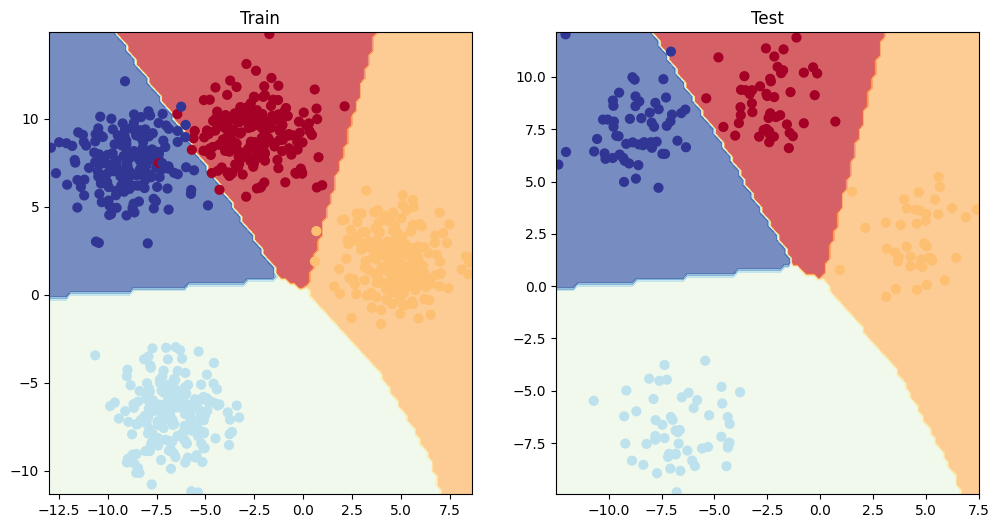

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

In [ ]:
y_test_preds[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [ ]:
from torchmetrics import Accuracy

torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES).to(device)
torchmetrics_accuracy(y_test_preds, y_blob_test)

tensor(0.9950, device='cuda:0')